# **Stage Zero: Data Selection** 



* Here, I will do some data analysis within the dataset. There are already 20 species here, so we good.
* I will load the metadata csv and clean it up, then do some data analysis
* From the selected species, I will then convert the audio samples into npy format to remove that step in later stages

## Libraries

In [3]:
# Standard libraries
import numpy as np
import pandas as pd
import os
import time

# Libraries for audio
from IPython.display import Audio
import librosa

# Training and Testing Split
from sklearn.model_selection import train_test_split

# Splitting data
import tensorflow as tf

# Operational
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import csv

## Cleaning the dataset

In [20]:
# Locations
path = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/audio_files' # Where all the species are stored


In [17]:
input_file = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/raw_metadata.csv' # raw metadata
df = pd.read_csv(input_file, delimiter=';')
df.head()

,species,audio_name,spectrogram_name,sec_i,sec_f
0,Acrocephalus arundinaceus,XC417157.mp3,XC417157_0.npy,2.168,3.168
1,Acrocephalus arundinaceus,XC417157.mp3,XC417157_1.npy,2.968,3.968
2,Acrocephalus arundinaceus,XC417157.mp3,XC417157_2.npy,3.768,4.768
3,Acrocephalus arundinaceus,XC417157.mp3,XC417157_3.npy,4.568,5.108
4,Acrocephalus arundinaceus,XC417157.mp3,XC417157_4.npy,19.289,20.289


In [18]:
column_delete = ['spectrogram_name', 'sec_i', 'sec_f']
filtered_df = df.copy()

In [19]:
filtered_df.drop(column_delete, axis=1, inplace=True)
filtered_df.head()

,species,audio_name
0,Acrocephalus arundinaceus,XC417157.mp3
1,Acrocephalus arundinaceus,XC417157.mp3
2,Acrocephalus arundinaceus,XC417157.mp3
3,Acrocephalus arundinaceus,XC417157.mp3
4,Acrocephalus arundinaceus,XC417157.mp3


In [24]:
filtered_df['audio_name'].value_counts()

audio_name
XC478850.mp3    401
XC440361.mp3    328
XC416749.mp3    254
XC406576.mp3    211
XC477945.mp3    177
               ... 
XC380536.mp3      1
XC380537.mp3      1
XC121174.mp3      1
XC432223.mp3      1
XC550266.mp3      1
Name: count, Length: 879, dtype: int64

### Removing the duplicates

In [21]:
md_clean = filtered_df.drop_duplicates(subset=['species', 'audio_name'], keep='first')

In [25]:
md_clean['audio_name'].value_counts()

audio_name
XC417157.mp3    1
XC528507.mp3    1
XC477749.mp3    1
XC478070.mp3    1
XC478568.mp3    1
               ..
XC396414.mp3    1
XC396416.mp3    1
XC414856.mp3    1
XC417089.mp3    1
XC97974.mp3     1
Name: count, Length: 879, dtype: int64

### Checking the sample rate of the audio, the channels, and the duration

In [35]:
# Function to check the sample rate and mono/stereo status
def check_audio_properties(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        # Determine if audio is mono or stereo
        if len(y.shape) == 1:
            channels = 'Mono'
        else:
            channels = 'Stereo'
        
        return sr, channels, duration
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None, None

In [36]:
md_clean['sample_rate'] = None
md_clean['channels'] = None
md_clean['duration'] = None

md_clean.reset_index()

C:\Users\thato\AppData\Local\Temp\ipykernel_24000\3839703318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_clean['sample_rate'] = None
C:\Users\thato\AppData\Local\Temp\ipykernel_24000\3839703318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_clean['channels'] = None
C:\Users\thato\AppData\Local\Temp\ipykernel_24000\3839703318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,index,species,audio_name,sample_rate,channels,duration
0,0,Acrocephalus arundinaceus,XC417157.mp3,None,None,None
1,6,Acrocephalus arundinaceus,XC417158.mp3,None,None,None
2,28,Acrocephalus arundinaceus,XC417425.mp3,None,None,None
3,152,Acrocephalus arundinaceus,XC417722.mp3,None,None,None
4,211,Acrocephalus arundinaceus,XC419606.mp3,None,None,None
...,...,...,...,...,...,...
874,17462,Tachybaptus ruficollis,XC516379.mp3,None,None,None
875,17466,Tachybaptus ruficollis,XC518432.mp3,None,None,None
876,17477,Tachybaptus ruficollis,XC518527.mp3,None,None,None
877,17508,Tachybaptus ruficollis,XC520116.mp3,None,None,None


In [37]:
md_clean['species'].value_counts()

species
Himantopus himantopus        70
Alcedo atthis                64
Charadrius alexandrinus      58
Tachybaptus ruficollis       56
Botaurus stellaris           56
Fulica atra                  55
Gallinula chloropus          54
Porphyrio porphyrio          53
Acrocephalus melanopogon     50
Ardea purpurea               43
Motacilla flava              42
Ciconia ciconia              40
Dendrocopos minor            39
Ixobrychus minutus           38
Circus aeruginosus           38
Acrocephalus scirpaceus      37
Acrocephalus arundinaceus    34
Coracias garrulus            24
Anas platyrhynchos           19
Anas strepera                 9
Name: count, dtype: int64

In [38]:
for index, row in tqdm(md_clean.iterrows(), desc="Processing data"):
    folder = row['species']
    audio_file = row['audio_name']
    file_path = os.path.join(path, folder, audio_file)
    
    # Get the sample rate and mono/stereo information
    sample_rate, channels, duration = check_audio_properties(file_path)
    
    # Update the dataframe with this information
    md_clean.at[index, 'sample_rate'] = sample_rate
    md_clean.at[index, 'channels'] = channels
    md_clean.at[index, 'duration'] = duration

md_clean.head()


Processing data: 879it [00:52, 16.61it/s]


,species,audio_name,sample_rate,channels,duration
0,Acrocephalus arundinaceus,XC417157.mp3,48000,Mono,23.244979
6,Acrocephalus arundinaceus,XC417158.mp3,48000,Mono,62.076979
28,Acrocephalus arundinaceus,XC417425.mp3,44100,Mono,129.032902
152,Acrocephalus arundinaceus,XC417722.mp3,48000,Mono,89.004979
211,Acrocephalus arundinaceus,XC419606.mp3,32000,Mono,46.692


# Data Analysis

### Checking for class imbalance by sample size

In [39]:
counts = md_clean['species'].value_counts().reset_index()
counts.columns = ['species', 'Number']

# Sort by the 'species' column (which was formerly 'index')
counts = counts.sort_values('Number', ascending=False)

# Display the result
counts.head(20)

,species,Number
0,Himantopus himantopus,70
1,Alcedo atthis,64
2,Charadrius alexandrinus,58
3,Tachybaptus ruficollis,56
4,Botaurus stellaris,56
5,Fulica atra,55
6,Gallinula chloropus,54
7,Porphyrio porphyrio,53
8,Acrocephalus melanopogon,50
9,Ardea purpurea,43


In [12]:
np.max(counts['species'])

'yewgre1'

### Checking for class imbalance by duration

In [42]:
md_clean.head()

,species,audio_name,sample_rate,channels,duration
0,Acrocephalus arundinaceus,XC417157.mp3,48000,Mono,23.244979
6,Acrocephalus arundinaceus,XC417158.mp3,48000,Mono,62.076979
28,Acrocephalus arundinaceus,XC417425.mp3,44100,Mono,129.032902
152,Acrocephalus arundinaceus,XC417722.mp3,48000,Mono,89.004979
211,Acrocephalus arundinaceus,XC419606.mp3,32000,Mono,46.692


In [51]:
duration_sum = md_clean.groupby('species', as_index=False)['duration'].sum()
duration_sum['duration_mins'] = duration_sum['duration'] / 60
duration_sum = duration_sum.sort_values('duration', ascending=False)
duration_sum.head(20)

,species,duration,duration_mins
0,Acrocephalus arundinaceus,5199.704975,86.66175
2,Acrocephalus scirpaceus,3969.428261,66.157138
1,Acrocephalus melanopogon,3594.174897,59.902915
12,Dendrocopos minor,3594.084499,59.901408
15,Himantopus himantopus,2989.731123,49.828852
7,Botaurus stellaris,2865.785787,47.763096
17,Motacilla flava,2243.320522,37.388675
19,Tachybaptus ruficollis,2031.902483,33.865041
3,Alcedo atthis,2025.259143,33.754319
16,Ixobrychus minutus,1636.589857,27.276498


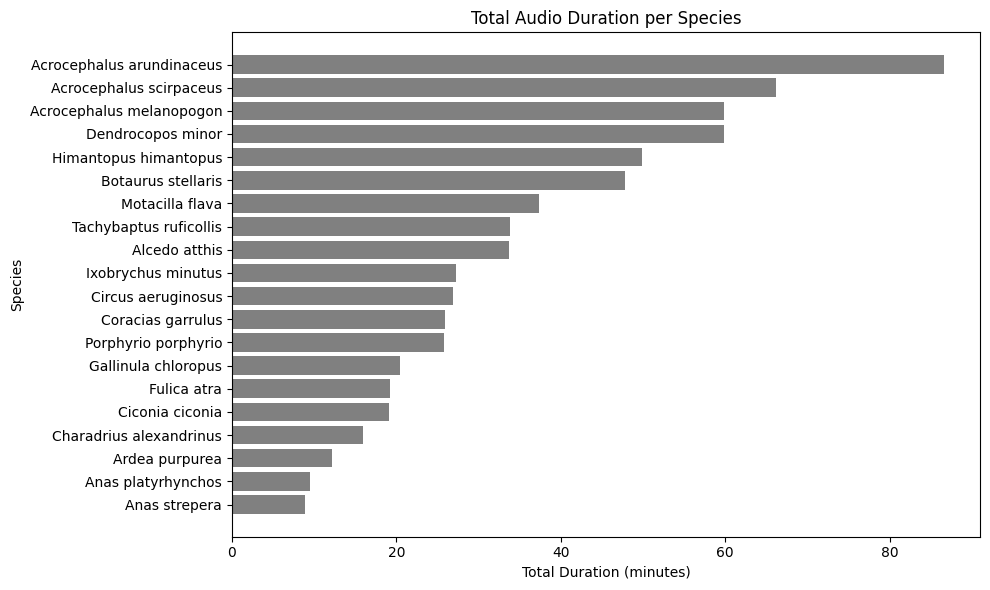

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(duration_sum['species'], duration_sum['duration_mins'], color='gray')

plt.xlabel('Total Duration (minutes)')
plt.ylabel('Species')
plt.title('Total Audio Duration per Species')
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

# **Downsampling for consistency**

Since the sample rate of the audio samples are from 48000 to 32000, I will downsample them to 22050Hz. Most bird calss are from 1kHz to 8kHz so this should give enough headroom to capture the frequency content. It coveres frequencies up to 11000Hz. THis would balance the quality of the data and the computational efficiency. 

Having a higher sampling rate adds more computational load without significant gain.

In [58]:
# Resample to 22,050 Hz and convert to mono and return the duration
def process_audio(file_path, target_sr=22050):
    try:
        # Load and resample the audio to 22,050 Hz, force mono
        y, sr = librosa.load(file_path, sr=target_sr, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None

In [60]:
df_filt = filtered_df.drop_duplicates(subset=['species', 'audio_name'], keep='first')
df_filt['duration'] = None

for index, row in tqdm(df_filt.iterrows(), desc="Processing data"):
    folder = row['species']
    audio_file = row['audio_name']
    file_path = os.path.join(path, folder, audio_file)
    
    # Get the sample rate and mono/stereo information
    duration = process_audio(file_path)
    
    # Update the dataframe with this informatio
    df_filt.at[index, 'duration'] = duration

df_filt.head()


C:\Users\thato\AppData\Local\Temp\ipykernel_24000\3800078436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['duration'] = None
Processing data: 879it [00:59, 14.88it/s]


,species,audio_name,duration
0,Acrocephalus arundinaceus,XC417157.mp3,23.244989
6,Acrocephalus arundinaceus,XC417158.mp3,62.077007
28,Acrocephalus arundinaceus,XC417425.mp3,129.032925
152,Acrocephalus arundinaceus,XC417722.mp3,89.004989
211,Acrocephalus arundinaceus,XC419606.mp3,46.692018


In [65]:
df_filt = df_filt.reset_index(drop=True)
column_delete = ['index']
df_filt.drop(column_delete, axis=1, inplace=True)
df_filt.head()


,species,audio_name,duration
0,Acrocephalus arundinaceus,XC417157.mp3,23.244989
1,Acrocephalus arundinaceus,XC417158.mp3,62.077007
2,Acrocephalus arundinaceus,XC417425.mp3,129.032925
3,Acrocephalus arundinaceus,XC417722.mp3,89.004989
4,Acrocephalus arundinaceus,XC419606.mp3,46.692018


In [66]:
sr = 22050

# Splitting into training and testing

In [69]:
train, test = train_test_split(df_filt, test_size=0.3, random_state=1007) # For reproducibility

## Extracting the numpy arrays

In [67]:
# Function to load audio
def extract_audio(filename, sr=sr):
  filepath = path + filename
  audio, _ = librosa.load(filepath, sr=sr, mono=True)
  return audio

In [72]:
# Function to save the audio as np arrays
def save_audio_np(df, is_train):
    folder_dir = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/train_audio_npy/' if is_train else 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/test_audio_npy/'
    os.makedirs(folder_dir, exist_ok=True)  # Use exist_ok=True to avoid errors if the folder exists
    filepaths = []

    # Loop over the filenames, extract the np objects, and save them to the respective directory
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Saving audio files", unit="file"):
        folder = row['species']
        name = row['audio_name']
        audio = extract_audio(f'/{folder}/{name}')
        new_filename = name.replace('.mp3', '.npy')
        filepaths.append(f'{folder}/{new_filename}')

        # Create save directory
        save_dir = f'{folder_dir}/{folder}/'
        os.makedirs(save_dir, exist_ok=True)
        save_filename = f'{save_dir}{new_filename}'

        # Check if the file already exists
        if os.path.exists(save_filename):
            print(f"File {save_filename} already exists. Skipping...")
            continue  # Skip the current iteration if the file exists

        # Save .npy object
        np.save(save_filename, audio)

    # Assert all filenames have been looped through, and all files have been saved
    assert len(df) == len(filepaths)
    return filepaths

In [75]:
train_filepaths = save_audio_np(train, is_train=True)
train['filename_npy'] = train_filepaths # Adding new column with the location of the npy filepaths

Saving audio files: 100%|██████████| 615/615 [01:15<00:00,  8.18file/s]


In [76]:
train.head()

,species,audio_name,duration,filename_npy
740,Motacilla flava,XC252756.mp3,78.216009,Motacilla flava/XC252756.npy
247,Ardea purpurea,XC467373.mp3,19.57805,Ardea purpurea/XC467373.npy
77,Acrocephalus melanopogon,XC516174.mp3,107.075918,Acrocephalus melanopogon/XC516174.npy
574,Gallinula chloropus,XC467260.mp3,29.753469,Gallinula chloropus/XC467260.npy
75,Acrocephalus melanopogon,XC467403.mp3,74.143311,Acrocephalus melanopogon/XC467403.npy


In [77]:
test_filepaths = save_audio_np(test, is_train=False)
test['filename_npy'] = test_filepaths # Adding new column with the location of the npy filepaths

Saving audio files: 100%|██████████| 264/264 [00:19<00:00, 13.34file/s]


In [78]:
train.to_csv('C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/train.csv')
test.to_csv('C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/test.csv')

# **Adding Annotations**

so the dataset that i have of the different bird calls is annotated. So if the audio fileis XC417157.mp3, the accompanying annotation file is XC417157.txt. The text file has the follwing structure:

0.463875	0.634419	call

1.664493	1.828211	call

4.618285	4.829759	call

5.982623	6.166795	call

7.797193	7.947283	call

Where its annotating which parts of the audio contain actual bird calls or songs in seconds.

So its Start | End | Type

In [79]:
train

,species,audio_name,duration,filename_npy
740,Motacilla flava,XC252756.mp3,78.216009,Motacilla flava/XC252756.npy
247,Ardea purpurea,XC467373.mp3,19.57805,Ardea purpurea/XC467373.npy
77,Acrocephalus melanopogon,XC516174.mp3,107.075918,Acrocephalus melanopogon/XC516174.npy
574,Gallinula chloropus,XC467260.mp3,29.753469,Gallinula chloropus/XC467260.npy
75,Acrocephalus melanopogon,XC467403.mp3,74.143311,Acrocephalus melanopogon/XC467403.npy
...,...,...,...,...
565,Fulica atra,XC550266.mp3,13.068435,Fulica atra/XC550266.npy
391,Ciconia ciconia,XC25468.mp3,13.374694,Ciconia ciconia/XC25468.npy
503,Dendrocopos minor,XC519985.mp3,23.24898,Dendrocopos minor/XC519985.npy
530,Fulica atra,XC480979.mp3,21.697007,Fulica atra/XC480979.npy


In [80]:
# Function to read the annotation file
def read_annotation_file(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 3:  # Ensure that we have 3 parts
                start, end, label = parts
                annotations.append({'start': float(start), 'end': float(end), 'label': label})
    return annotations

In [82]:
# Function to annotate the DataFrame
def annotate_dataframe(df, base_audio_dir):
    annotation_data = []
    
    for index, row in df.iterrows():
        species = row['species']
        audio_name = row['audio_name']
        
        # Construct the path to the annotation file
        audio_folder = os.path.join(base_audio_dir, species)
        annotation_file_path = os.path.join(audio_folder, audio_name.replace('.mp3', '.txt'))
        
        if os.path.exists(annotation_file_path):
            annotations = read_annotation_file(annotation_file_path)
            # Append annotations to the audio information
            for annotation in annotations:
                annotation_data.append({
                    'species': species,
                    'audio_name': audio_name,
                    'duration': row['duration'],
                    **annotation  # Unpack start, end, and label into the dict
                })

    annotation_df = pd.DataFrame(annotation_data)
    return annotation_df

In [85]:
train_annotated_df = annotate_dataframe(train, path)

In [87]:
train_annotated_df.head(20)

,species,audio_name,duration,start,end,label
0,Motacilla flava,XC252756.mp3,78.216009,1.497278,2.324132,song
1,Motacilla flava,XC252756.mp3,78.216009,5.352209,6.592501,song
2,Motacilla flava,XC252756.mp3,78.216009,9.799347,10.570327,song
3,Motacilla flava,XC252756.mp3,78.216009,14.995125,15.721416,song
4,Motacilla flava,XC252756.mp3,78.216009,19.297005,20.000963,song
5,Motacilla flava,XC252756.mp3,78.216009,22.023391,23.017849,song
6,Motacilla flava,XC252756.mp3,78.216009,23.185457,23.665915,song
7,Motacilla flava,XC252756.mp3,78.216009,25.990059,26.392309,song
8,Motacilla flava,XC252756.mp3,78.216009,30.627151,31.286401,song
9,Motacilla flava,XC252756.mp3,78.216009,35.336871,36.051976,song


In [88]:
train_annotated_df.to_csv('C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/train-annotated.csv')

In [89]:
test_annotated_df = annotate_dataframe(test, path)

In [90]:
test_annotated_df.to_csv('C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V3/test-annotated.csv')